<a href="https://colab.research.google.com/github/Deanelle/World-Happiness-Statistical-Analysis-/blob/main/Impact_of_Social_Support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction** 

---


The World Happiness Report up to 2021 is an interesting survey that looks at the state of worldwide happiness of 153 nations. 

Happiness is vital to living a long, prosperous life and I would like to focus on how social support plays a role in  healthy life expectancy. I would like to foucs on this aspect of the data because of how important it is for people to have a sense of belonging and camaraderie. 

 **Question(s):** 

Does social support mean longer life expectancy? 

What can we learn from the data by examing social support? 

Can the data tell us why are social supports needed in life or what potential impact that they can have? 

Are social supports impacted regional? If so, what does this mean culturally? Does the environment a culture creates helps to add to if someone feels as if they more social support or not? 


Since, I am examing the relationship between two variables, I am going to set up a pearson corrleation test to examine the relationship between social support and life expectancy. I'm going to do this by calculating the r-coffcient and then looking at statistical significance with the p-value. First though these are my hypothesis: 

**Hypothesis**

---

H_o: There is no statistically significant correlation between social support and healthy life expectancy in population. 

H_a: There is statistically significant correlation between social support and healthy life expectancy in population.

**Data**

---

The joy scores and rankings utilize information from the Gallup World Survey. The scores are based on answers to the most life evaluation addresses inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a 0 and to rate their  current lives on that scale. 

The columns taking after the bliss score assess the degree to which each of six variables – financial generation, social support, healthy life expectacion, flexibility, nonattendance of debasement, and liberality – contribute to making life assessments higher in each nation than they are in what would be considered a Dystopia. 


This file contains the Happiness Score for 153 countries and looks holistically at the other scores that influence that score which provides insights into what these countries are currently doing or need to do to help increase the happiness of its citizens. 
The Happiness Score is explained by the following factors: GDP per capita,  Healthy Life Expectancy, Social support, Freedom to make life choices, Generosity, Corruption Perception
The data comes from: 
https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv


In [ ]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

happiness = pd.read_csv('world-happiness-report-2021.csv')

In [ ]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

There are 20 columns in the data. The only objects in the data are the country name and the regional indicator. All of the other columns are floats. One thing that I want to change though are the first letters in the columns. Since some are upper cased and some are lower cased, just for ease of coding I'm going to make all of the variables first letter lower case.  

In [ ]:
# Convert column headers to lower case for ease of coding

happiness.columns = happiness.columns.str.lower()

In [ ]:
happiness.head()

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Checking the first few columns, there appears to be no null values. I'm going to check the last few colums as well. 

In [ ]:
happiness.tail()

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


There are no null values in this part of the dataset too. One thing interesting looking here is that the ladder scores, life expectancy and the social support are lower than the ones earlier in the data. When exploring the data more in detail I'd like to order the data in from highest to lowest based on laddes score and see how the other columns look. 



In [ ]:
#final check to see if there are any null values
happiness.isnull().sum()

country name                                  0
regional indicator                            0
ladder score                                  0
standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
logged gdp per capita                         0
social support                                0
healthy life expectancy                       0
freedom to make life choices                  0
generosity                                    0
perceptions of corruption                     0
ladder score in dystopia                      0
explained by: log gdp per capita              0
explained by: social support                  0
explained by: healthy life expectancy         0
explained by: freedom to make life choices    0
explained by: generosity                      0
explained by: perceptions of corruption       0
dystopia + residual                           0
dtype: int64

**Data Exploration**



In [ ]:
#I want to understand the data a bit more by understanding its distribution
happiness[['country name','healthy life expectancy','social support']].describe

<bound method NDFrame.describe of     country name  healthy life expectancy  social support
0        Finland                   72.000           0.954
1        Denmark                   72.700           0.954
2    Switzerland                   74.400           0.942
3        Iceland                   73.000           0.983
4    Netherlands                   72.400           0.942
..           ...                      ...             ...
144      Lesotho                   48.700           0.787
145     Botswana                   59.269           0.784
146       Rwanda                   61.400           0.552
147     Zimbabwe                   56.201           0.750
148  Afghanistan                   52.493           0.463

[149 rows x 3 columns]>

Looking here it looks like those countries with a higher social support have a heathlier life expectancy. Let's dive more into the data and see what else I find. 

**Univariate Analysis**

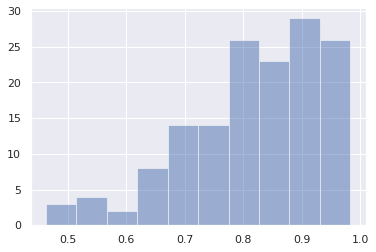

In [ ]:
#plot the histograms

plt.hist(happiness['social support'], alpha = .5)
plt.show()



The majority of countries have a social support amount around .75 and .9. 

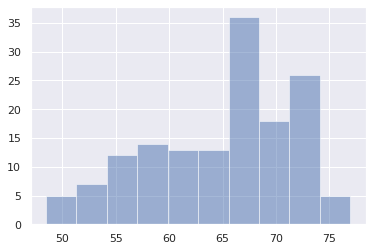

In [ ]:
plt.hist(happiness['healthy life expectancy'], alpha = .5)
plt.show()

The maority of the world appears to live for around 65-70 ish years. 

In [ ]:
#checking the mean and other descriptive statistics
print(stats.describe(happiness['social support']))
print(stats.describe(happiness['healthy life expectancy']))

DescribeResult(nobs=149, minmax=(0.463, 0.983), mean=0.8147449664429529, variance=0.013199488572465081, skewness=-0.9283426488343074, kurtosis=0.34181122747473713)
DescribeResult(nobs=149, minmax=(48.478, 76.953), mean=64.99279865771811, variance=45.72522675648467, skewness=-0.5167282003866006, kurtosis=-0.5854382271776943)


The average life expectancy is 64 and the average social support is 81. These can be used as measures to determine what makes a good social support score and what makes a bad one so when making reccommendations we can determine what is it that allows individuals to live longer and what things are needed to be in place to make that so. 

In [ ]:
happiness[['social support', 'healthy life expectancy']].describe()

,social support,healthy life expectancy
count,149.000000,149.000000
mean,0.814745,64.992799
std,0.114889,6.762043
min,0.463000,48.478000
25%,0.750000,59.802000
50%,0.832000,66.603000
75%,0.905000,69.600000
max,0.983000,76.953000


**Bivariate Analysis**

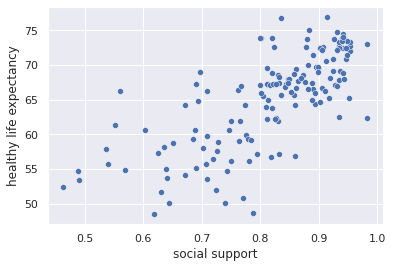

In [ ]:
#make a scatterplot 
#this shows the relationship between social support and healthy life expectancy better than the histograms
sns.scatterplot(x="social support", y="healthy life expectancy", data=happiness);

Based on observation from the scatterplot, there is a positive correlation between healthy life expectancy and social support. This means that as social support increases the life expectancy individual also increases. This could be for a number of reasons; better family structures which adds to happier indidviuals which also adds to longer lifes or better relationships which makes one feel more interconnected thus impacting mental and emotional health interpersonally and intrapersonally. This could be something to dive more deeply into later. 

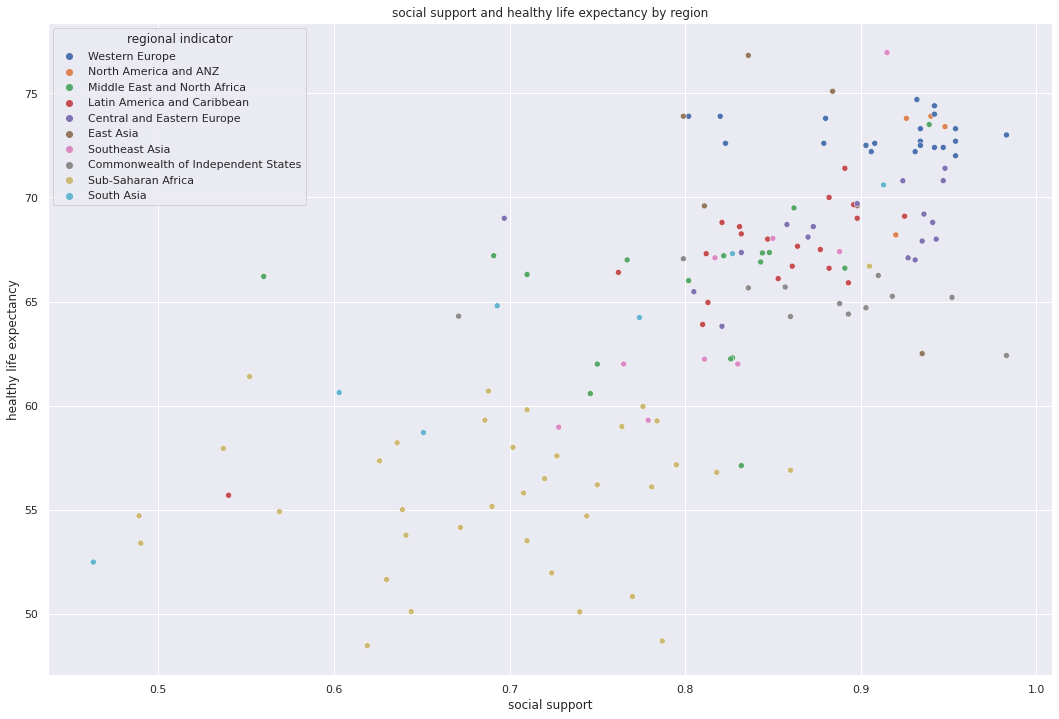

In [ ]:
plt.figure(figsize = (18,12))
sns.scatterplot(x="social support", y="healthy life expectancy", hue="regional indicator", data=happiness)
plt.xlabel('social support')
plt.ylabel('healthy life expectancy')
plt.title('social support and healthy life expectancy by region')
plt.show()

There appears to be a relationship between reigonal indicator, social support and life expectancy here as south asian and sub-subharan African countries have a lower life expectancy and social support. The question now is why? I'll dive some more into the other variables of the data. 

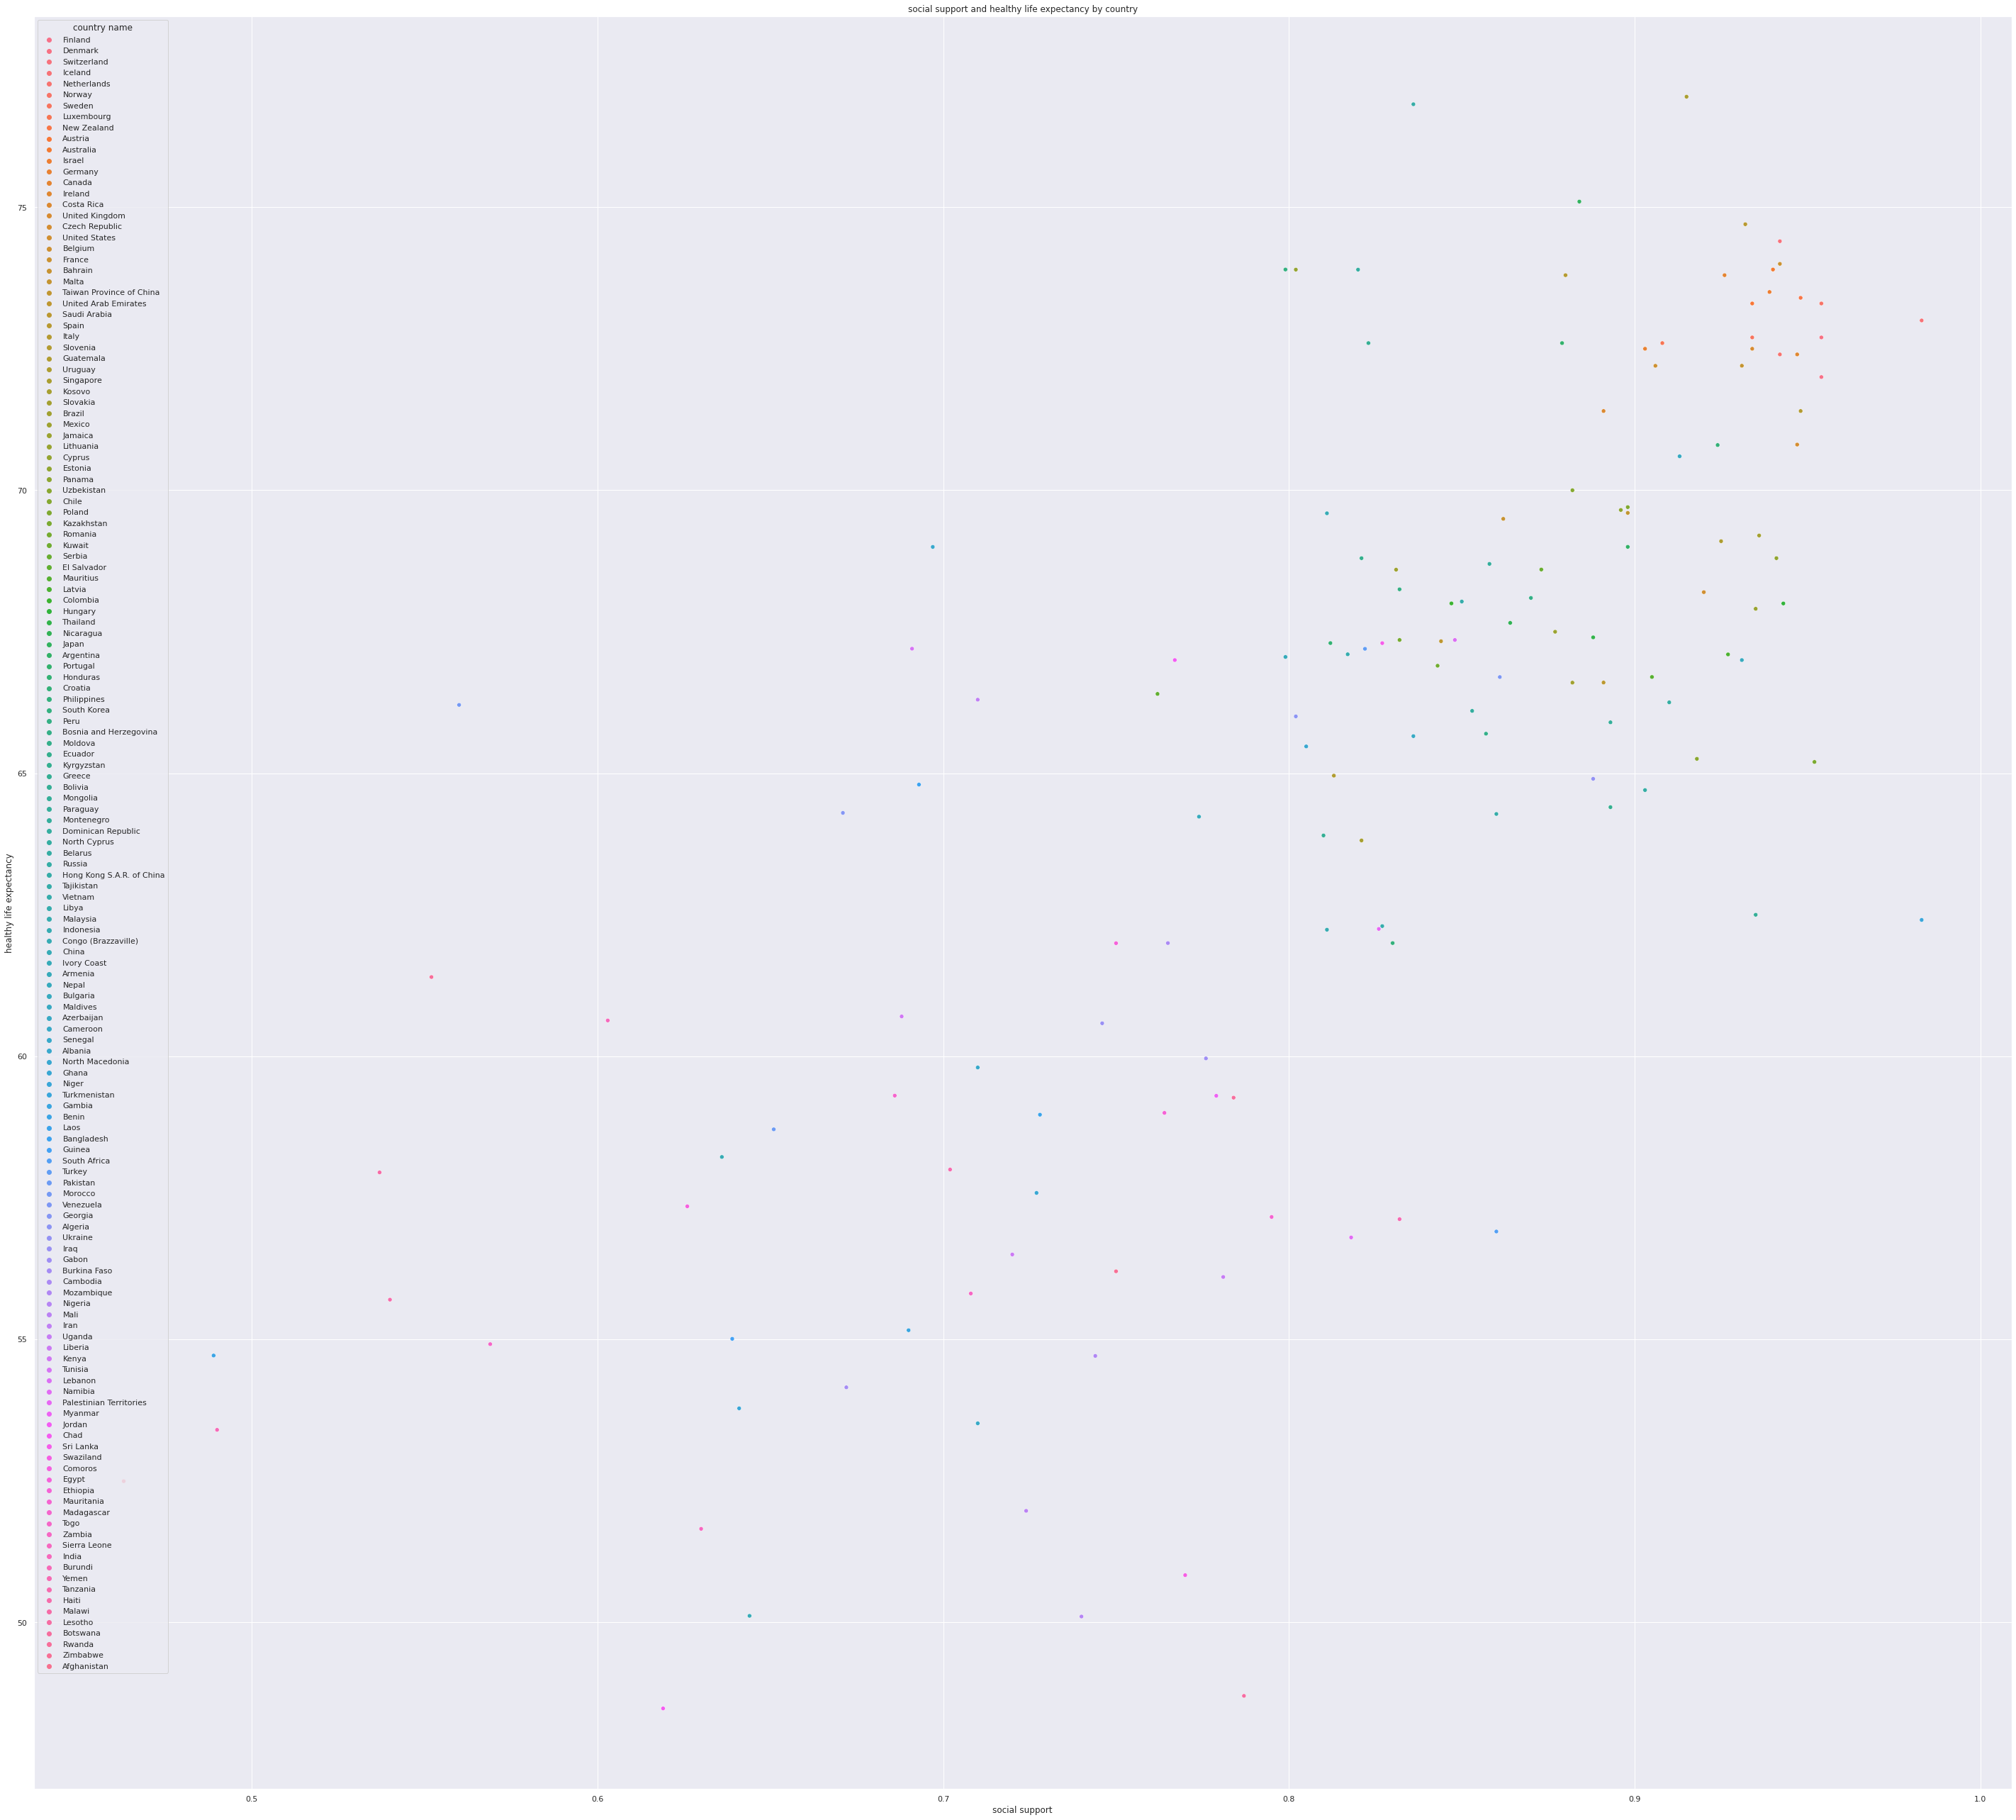

In [ ]:
#plotted of social support, life expectancy, and country name 
plt.figure(figsize = (50,46))
sns.scatterplot(x="social support", y="healthy life expectancy", hue="country name", data=happiness)
plt.xlabel('social support')
plt.ylabel('healthy life expectancy')
plt.title('social support and healthy life expectancy by country')
plt.show()

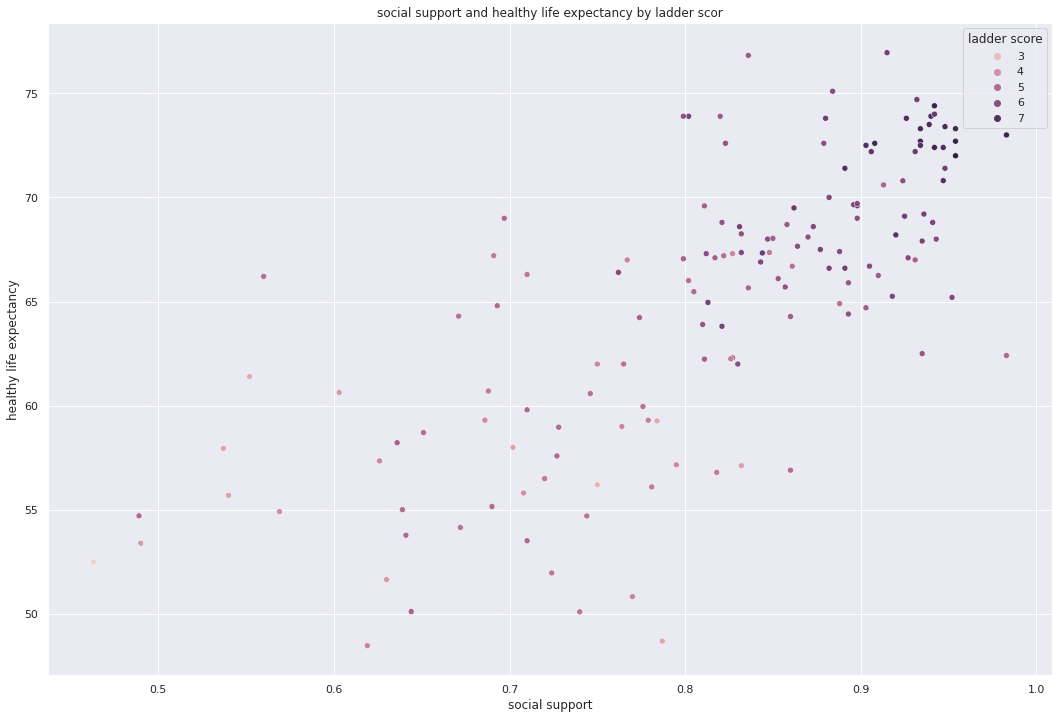

In [ ]:
plt.figure(figsize = (18,12))
sns.scatterplot(x="social support", y="healthy life expectancy", hue="ladder score", data=happiness)
plt.xlabel('social support')
plt.ylabel('healthy life expectancy')
plt.title('social support and healthy life expectancy by ladder scor')
plt.show()

It appears that those with a higher ladder score also had higher life expectancy as well as social support. 

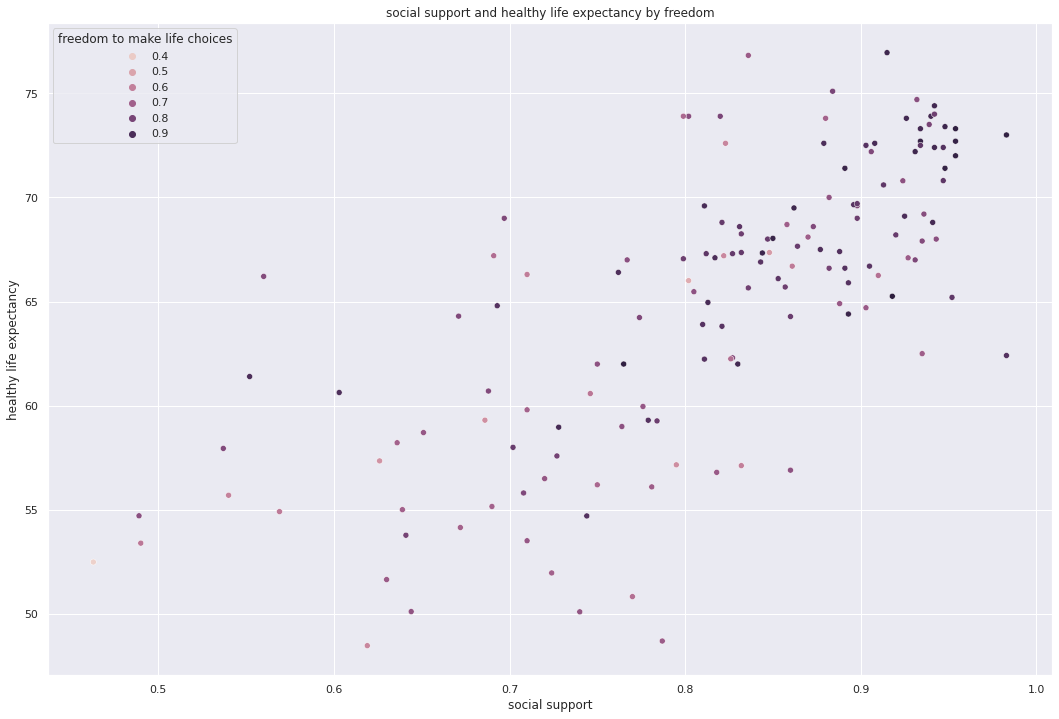

In [ ]:
plt.figure(figsize = (18,12))
sns.scatterplot(x="social support", y="healthy life expectancy", hue="freedom to make life choices", data=happiness)
plt.xlabel('social support')
plt.ylabel('healthy life expectancy')
plt.title('social support and healthy life expectancy by freedom')
plt.show()

While it appears that the relationship is not as strong as the previous chart, it seems that sense of freedom to make life choices does matter as it looks like the more darker shaded life support points have a higher life expectancy  and social support score. 

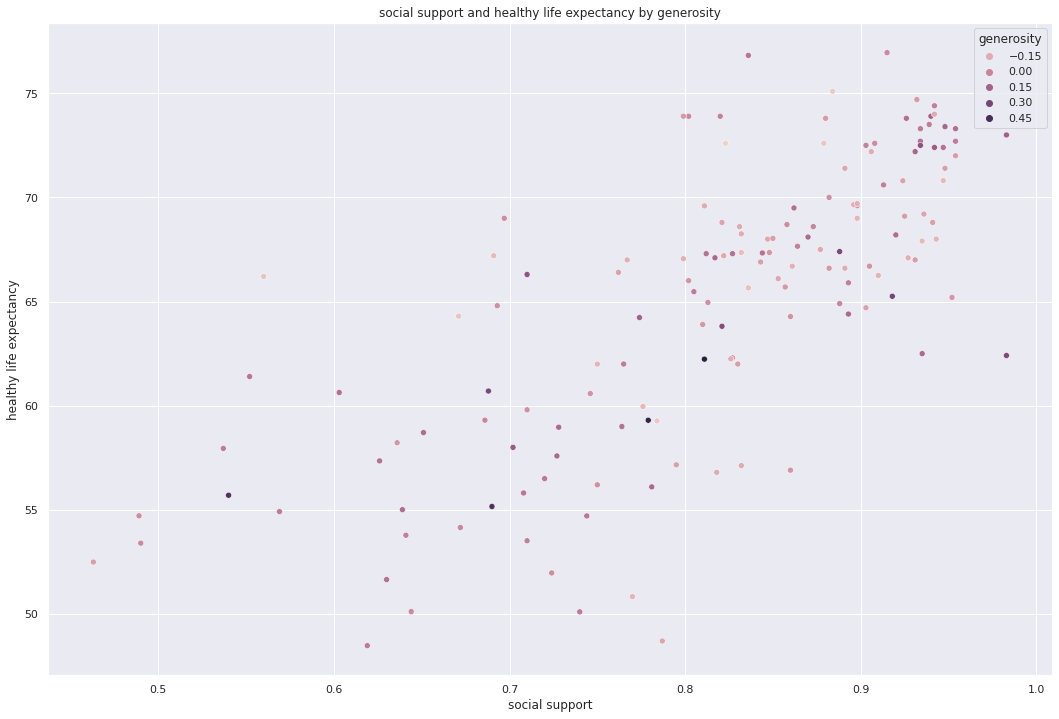

In [ ]:
plt.figure(figsize = (18,12))
sns.scatterplot(x="social support", y="healthy life expectancy", hue="generosity", data=happiness)
plt.xlabel('social support')
plt.ylabel('healthy life expectancy')
plt.title('social support and healthy life expectancy by generosity')
plt.show()

While generosity is a great quality it seems like it does not really matter much to social support or healthy life expectancy as it seems like the scores as all over the place. 

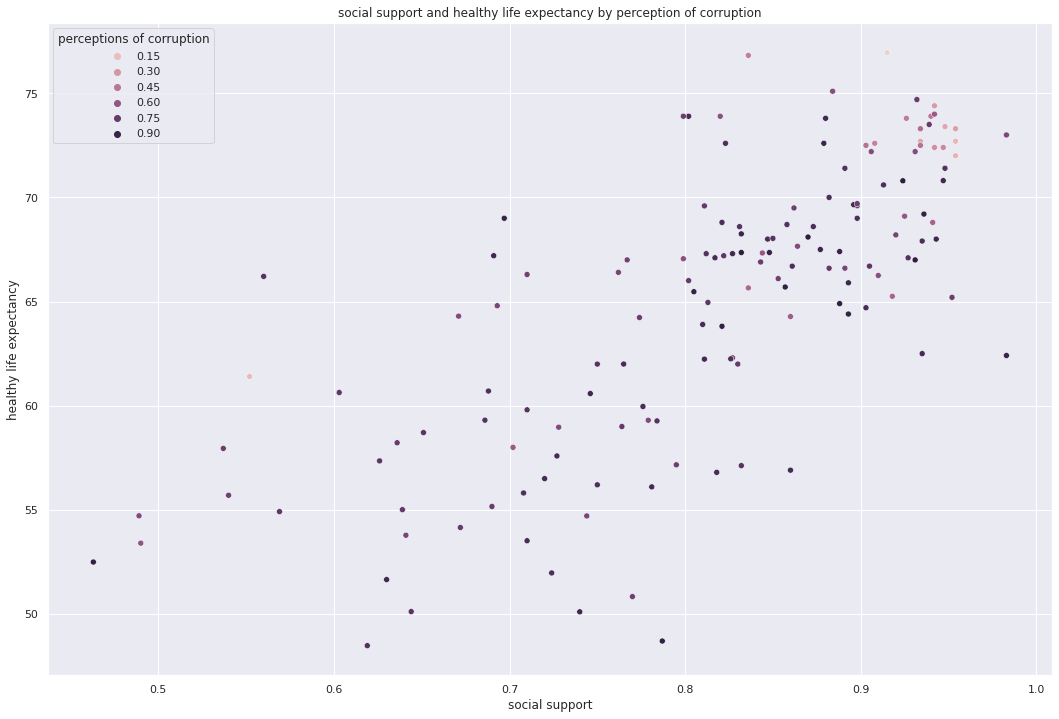

In [ ]:
plt.figure(figsize = (18,12))
sns.scatterplot(x="social support", y="healthy life expectancy", hue="perceptions of corruption", data=happiness)
plt.xlabel('social support')
plt.ylabel('healthy life expectancy')
plt.title('social support and healthy life expectancy by perception of corruption')
plt.show()

From the visulization it seems like the lower perceived perception is, the higher the social support score and life expectancy score based on the little pink shades being closer to the upper end.

In [ ]:
# five largest values in column social support 
happiness.nlargest(5, ['social support'])

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580


Western European countries have a higher social support score meaning that they feel more cared for, apart of a social network. This is interesting. I wonder what the top 10 looks like? 

In [ ]:
happiness.nlargest(10,['social support'])

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
44,Kazakhstan,Commonwealth of Independent States,6.152,0.047,6.243,6.060,10.155,0.952,65.200,0.853,-0.069,0.733,2.43,1.230,1.103,0.527,0.573,0.143,0.132,2.446
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.400,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
28,Slovenia,Central and Eastern Europe,6.461,0.043,6.546,6.376,10.529,0.948,71.400,0.949,-0.101,0.806,2.43,1.360,1.093,0.722,0.690,0.122,0.085,2.388
14,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124


A lot of countries from Europe have a high scoial support score as well as a high ladder score and life expectancy scores too. 

In [ ]:
#five largest values in column healthy life expectancy 
happiness.nlargest(5, ['healthy life expectancy'])

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
55,Japan,East Asia,5.940,0.040,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43,1.389,0.949,0.838,0.504,0.020,0.192,2.048
26,Spain,Western Europe,6.491,0.042,6.574,6.408,10.571,0.932,74.700,0.761,-0.081,0.745,2.43,1.375,1.057,0.826,0.462,0.135,0.124,2.513
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839


From the data, these are the countries with the highest life expectancy scores and they all have social support scores well above the mean score, 81 calculated earlier. I want to take a look at the top 10 here too. 

In [ ]:
#ten largest values in column healthy life expectancy 
happiness.nlargest(10, ['healthy life expectancy'])

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
55,Japan,East Asia,5.940,0.040,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43,1.389,0.949,0.838,0.504,0.020,0.192,2.048
26,Spain,Western Europe,6.491,0.042,6.574,6.408,10.571,0.932,74.700,0.761,-0.081,0.745,2.43,1.375,1.057,0.826,0.462,0.135,0.124,2.513
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
20,France,Western Europe,6.690,0.037,6.762,6.618,10.704,0.942,74.000,0.822,-0.147,0.571,2.43,1.421,1.081,0.804,0.536,0.092,0.235,2.521
10,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,0.159,0.442,2.43,1.453,1.076,0.801,0.647,0.291,0.317,2.598
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.900,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262
38,Cyprus,Western Europe,6.223,0.049,6.319,6.128,10.576,0.802,73.898,0.763,-0.015,0.844,2.43,1.377,0.765,0.801,0.464,0.178,0.061,2.578
73,North Cyprus,Western Europe,5.536,0.051,5.636,5.435,10.576,0.820,73.898,0.795,0.012,0.626,2.43,1.377,0.806,0.801,0.503,0.196,0.200,1.653


Western Europe and East Asia have high social support scores and life expectancy. It is interesting here that South Korea's social suport score is 79 which is below the mean, 81 but that possible can be explain by the ladder score being 5.8. Meaning that other factors contribute to social support and life expectancy. 

In [ ]:
happiness.sort_values('ladder score')

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868


In [ ]:
happiness.sort_values('healthy life expectancy')

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
127,Chad,Sub-Saharan Africa,4.355,0.094,4.540,4.171,7.364,0.619,48.478,0.579,0.041,0.807,2.43,0.255,0.353,0.000,0.240,0.215,0.084,3.209
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
115,Nigeria,Sub-Saharan Africa,4.759,0.052,4.861,4.658,8.533,0.740,50.102,0.737,0.037,0.878,2.43,0.663,0.625,0.051,0.433,0.212,0.039,2.736
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,5.460,5.152,8.551,0.644,50.114,0.741,-0.016,0.794,2.43,0.669,0.409,0.052,0.438,0.177,0.092,3.469
129,Swaziland,Sub-Saharan Africa,4.308,0.071,4.448,4.168,9.065,0.770,50.833,0.647,-0.185,0.708,2.43,0.849,0.693,0.074,0.323,0.067,0.147,2.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
26,Spain,Western Europe,6.491,0.042,6.574,6.408,10.571,0.932,74.700,0.761,-0.081,0.745,2.43,1.375,1.057,0.826,0.462,0.135,0.124,2.513
55,Japan,East Asia,5.940,0.040,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43,1.389,0.949,0.838,0.504,0.020,0.192,2.048
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236


Looking at it regionally, the areas with lower ladder scores and lower life expectancy had lower social support scores. Which brings up the question what is it that could be driving that? 

In [ ]:
#dropping the columns I'm not doing my  analysis on
happiness.drop(columns=['upperwhisker', 'lowerwhisker','standard error of ladder score','explained by: perceptions of corruption','explained by: log gdp per capita','ladder score in dystopia','explained by: social support','explained by: healthy life expectancy','explained by: freedom to make life choices','explained by: generosity','explained by: perceptions of corruption','dystopia + residual'
])

,country name,regional indicator,ladder score,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


Text(0.5, 1.0, 'correlation matrix (healthy life expectancy)')

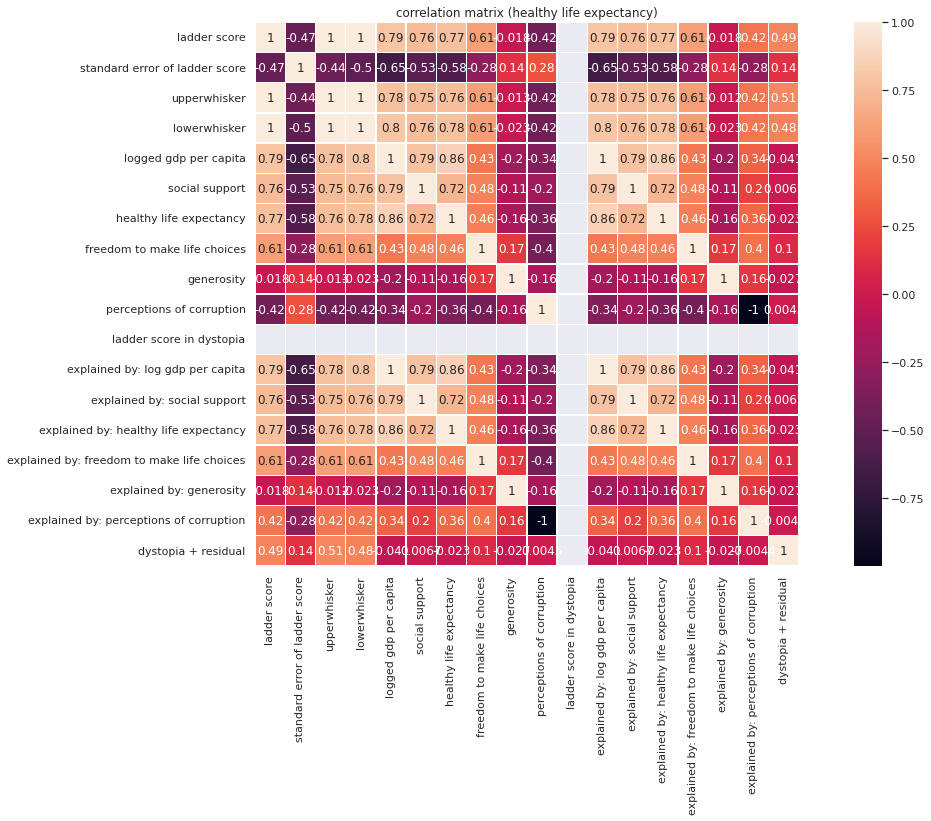

In [ ]:
corrmat_happiness=happiness.corr()

plt.figure(figsize=(20,10))

# Draw the heat map using seaborn
sns.heatmap(corrmat_happiness, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (healthy life expectancy)")


In [ ]:
# Get correlation matrix
corr= happiness.corr()['healthy life expectancy'].reset_index()
corr=corr.sort_values([('healthy life expectancy')],ascending=False)
corr

,index,healthy life expectancy
6,healthy life expectancy,1.000000
13,explained by: healthy life expectancy,0.999999
4,logged gdp per capita,0.859461
11,explained by: log gdp per capita,0.859446
3,lowerwhisker,0.776364
0,ladder score,0.768099
2,upperwhisker,0.758455
5,social support,0.723256
12,explained by: social support,0.723155
7,freedom to make life choices,0.461494


Based on this correlation map the factors that affect life expectancy the most are gdp( economic helath of a country), ladder score, and social support. 

In [ ]:
#taking a look at the variables impacting life expectancy the most
happiness[['social support', 'healthy life expectancy', 'ladder score','logged gdp per capita']].corr()

,social support,healthy life expectancy,ladder score,logged gdp per capita
social support,1.000000,0.723256,0.756888,0.785299
healthy life expectancy,0.723256,1.000000,0.768099,0.859461
ladder score,0.756888,0.768099,1.000000,0.789760
logged gdp per capita,0.785299,0.859461,0.789760,1.000000


In [ ]:
#correlation test for fun 
stats.pearsonr(happiness['social support'], happiness['healthy life expectancy'])

(0.723256131173897, 2.089673882312211e-25)

In [ ]:
#correlation test for fun 
stats.pearsonr(happiness['social support'], happiness['ladder score'])

(0.7568876453635002, 6.051516845658575e-29)

In [ ]:
#correlation test for fun 
stats.pearsonr(happiness['ladder score'], happiness['healthy life expectancy'])

(0.7680994550105208, 2.9617212615353468e-30)

## 5. Results

Based on a visual inspection and the correlation test, social support and healty life expectancy have a strong postive correlation. This means that the higher the social support, the higher the healthy life expectancy. The r-value being .723 shows this positve relationship. From this p-value, you can expect a signifciant correlation between these two variables to generalize out to the population. 

Therefore since the p-value is less than 5% we can conclude that it is statistically significant , we can reject the null hypothesis H_o and accept the alternative hypothesis H_a.

However, also based on analysis, social support is not the only contributing factor to healthy life expecatancy. It is important to have social support( that feeling of belonging and access to supports in a society) but it is also important to have stable economy, and high feeling of life satisfaction as well. 



## 6. Discussion and recommendation

Social Support and Healthy life expectancy have a strong positive correlation. Which means that as perception of social support goes up so does the healthy life expectancy. Meaning that having a strong social support correlates to having a higher healthy life expectancy. It is also important to highlight that it is not the cause of a healthy life expectancy as stated before. 


However, this research  still has implicatons for stakeholders who work as policy makers to make decisions about social impacts on health  and why it is important to address the social needs of their constituents. Thus, helping governments to focus on cultivating a social environment that is suitable for encouraging the health and happiness of their nation by putting in things that make people feel supported whether that be emotionally, physically, helping people build strong friendships, etc.. 


The question here though, how can I take this little experiement further?  Therefore, maybe as a next step in the process, I can examine how social support differs based on geographical regions or how it differs in regions over time through A/B testing and then see what each region's life excpectancy is to see if what occurs regionally( in a culture)plays a role in social support and what impact it has on life expectancy. 